# Anomaly detection on Fetal electrocardiography dataset

author: Elvira Dzhuraeva

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib.pyplot as plt
from MulticoreTSNE import MulticoreTSNE as TSNE
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
data = scipy.io.loadmat('cardio.mat')

X = pd.DataFrame(data['X'])
y = pd.DataFrame(data['y']).astype(int)

In [3]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018


In [4]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
count,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,...,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03,1.831000e+03
mean,1.144603e-15,9.408094e-16,8.313636e-16,-1.566682e-15,-2.365970e-15,-8.702229e-16,-4.825923e-15,-6.424862e-16,-2.267256e-15,-1.048072e-15,...,1.905448e-16,1.319413e-16,8.289989e-16,5.525649e-16,1.119925e-16,-3.283980e-16,-3.771484e-16,4.717387e-16,1.244226e-16,-1.173526e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.746331e+00,-9.199884e-01,-2.036405e-01,-1.635871e+00,-6.835985e-01,-6.140064e-02,-2.782949e-01,-1.949572e+00,-1.441358e+00,-4.204873e-01,...,-1.876524e+00,-1.439841e+00,-2.325379e+00,-1.441408e+00,-4.882789e-01,-4.567897e+00,-3.829316e+00,-4.113439e+00,-6.905897e-01,-2.126605e+00
25%,-7.358069e-01,-9.199884e-01,-2.036405e-01,-7.425390e-01,-6.835985e-01,-6.140064e-02,-2.782949e-01,-8.727134e-01,-7.464856e-01,-4.204873e-01,...,-8.704229e-01,-9.052873e-01,-6.753367e-01,-7.533948e-01,-4.882789e-01,-5.401537e-01,-5.730636e-01,-6.650764e-01,-5.903887e-01,-4.932940e-01
50%,4.912315e-03,-2.872966e-01,-2.036405e-01,2.691593e-02,-6.835985e-01,-6.140064e-02,-2.782949e-01,-3.515685e-02,-1.674248e-01,-4.204873e-01,...,-2.317947e-02,-5.000071e-02,-7.032128e-02,-6.538189e-02,-4.882789e-01,8.864667e-04,6.541726e-02,2.459619e-02,-3.899867e-01,-4.932940e-01
75%,6.398145e-01,6.604231e-01,-1.605488e-01,7.200708e-01,5.243316e-01,-6.140064e-02,-2.782949e-01,8.023997e-01,4.116360e-01,-1.715262e-01,...,7.446349e-01,8.765597e-01,5.896955e-01,6.226310e-01,-4.882789e-01,6.621578e-01,7.038981e-01,7.142687e-01,1.778189e-01,1.140018e+00
max,2.967789e+00,3.956212e+00,9.929345e+00,3.584122e+00,4.316910e+00,1.990039e+01,8.587322e+00,2.537338e+00,6.433868e+00,5.243379e+00,...,2.809791e+00,2.444585e+00,4.054783e+00,4.750709e+00,1.402534e+01,3.066781e+00,3.130125e+00,3.403992e+00,8.294100e+00,1.140018e+00


In [5]:
X.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19cf9160>,
      dtype=object)

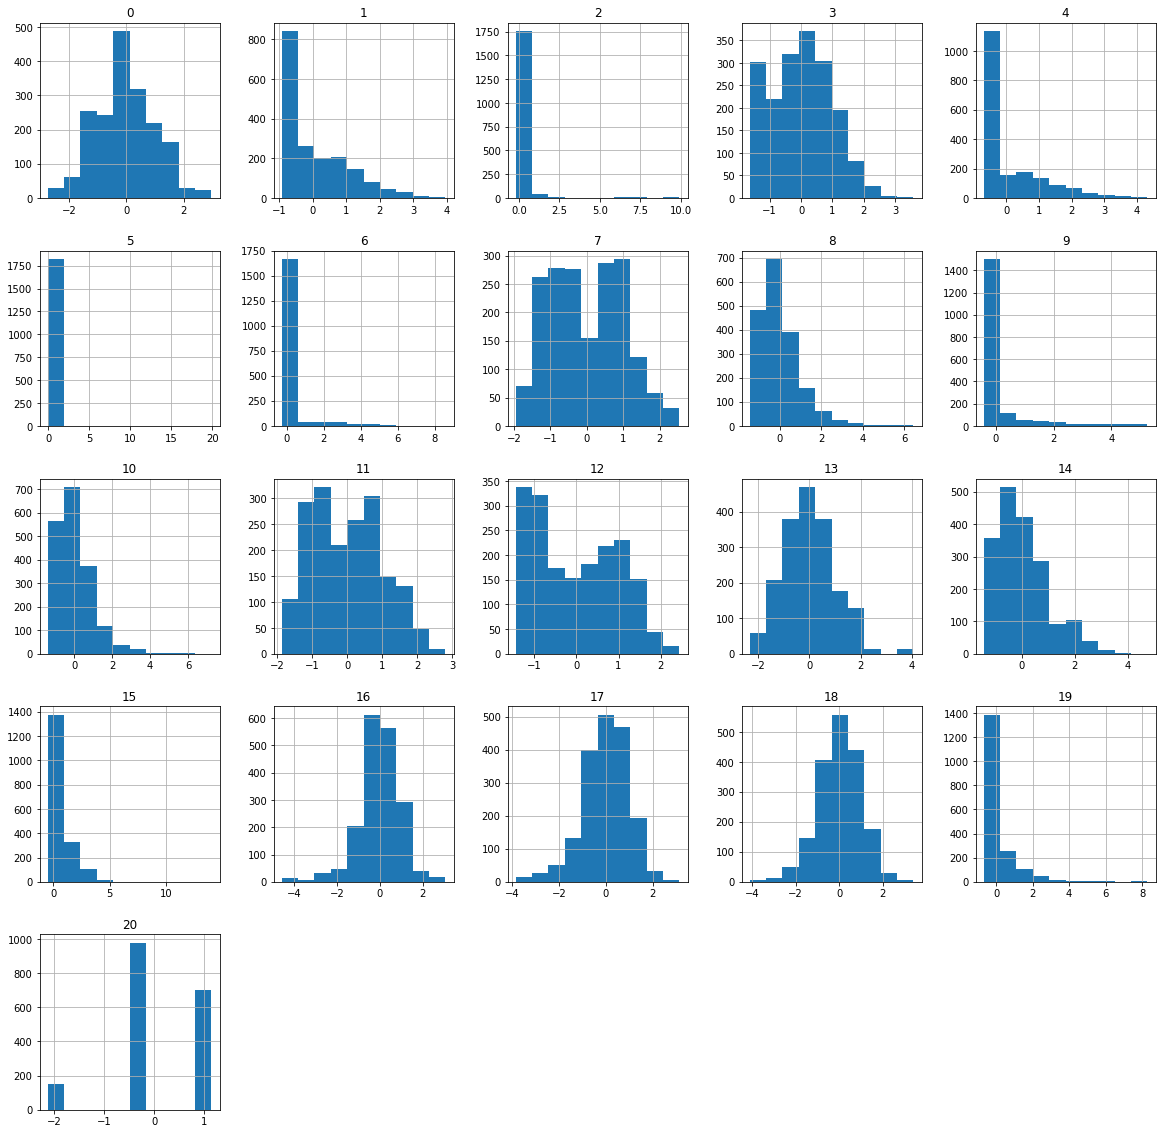

In [6]:
X.hist(figsize=(20,20))

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Посмотрим на изначальный расклад

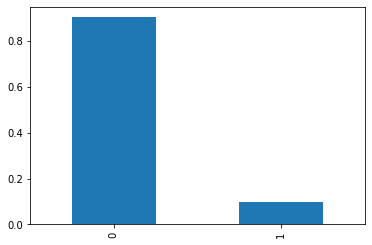

In [8]:
y[0].value_counts(normalize=True).plot.bar()

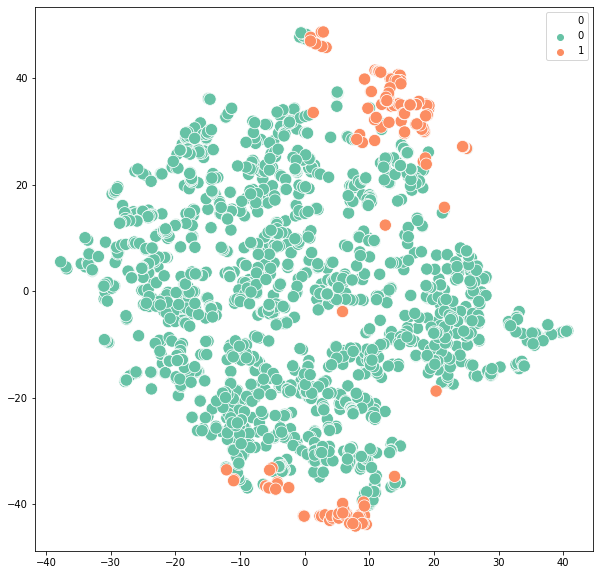

In [9]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    s=150,
    hue=y[0],
    palette="Set2",
    legend='full'
)

## Обучение на загрязнённых данных

### Isolation Forest

In [10]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(n_estimators=500,
                    contamination=float(.096),
                    n_jobs=-1,
                    random_state=42,
                    verbose=0)
clf.fit(X_scaled)

/Users/edzhurae/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.096,
                max_features=1.0, max_samples='auto', n_estimators=500,
                n_jobs=-1, random_state=42, verbose=0, warm_start=False)

In [11]:
pred = clf.predict(X)
pred = np.array([1 if p == -1 else 0 for p in pred])

/Users/edzhurae/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:415: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


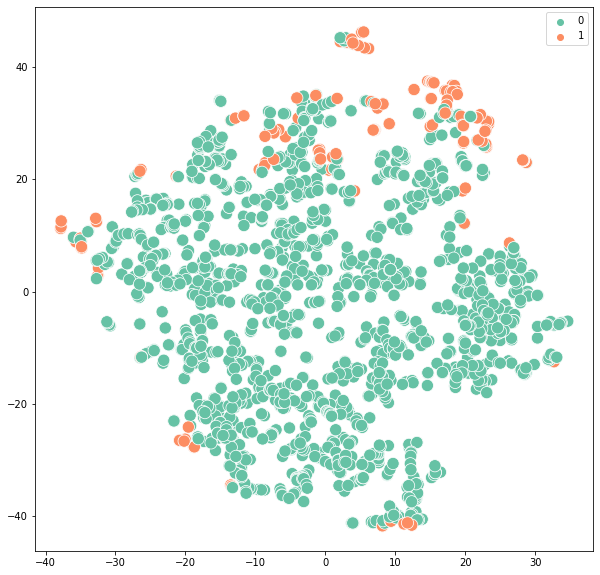

In [12]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    s=150,
    hue=pred,
    palette="Set2",
    legend='full'
)

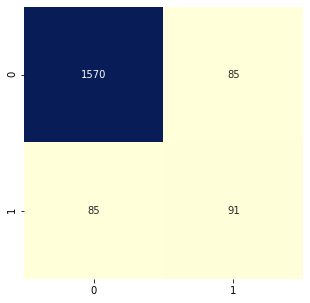

In [13]:
cm = confusion_matrix(y[0], pred)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

### DBSCAN

In [14]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.2, min_samples=4).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [15]:
outlier_percentage = 1.

eps = 3.8 #3.69
while outlier_percentage>0.096:
    model = DBSCAN(eps=eps, min_samples=150).fit(X_scaled)
    labels = model.labels_
    labels = np.array([1 if label == -1 else 0 for label in labels])
    np.unique(labels)
    outlier_percentage = np.mean(sum(labels==1))/labels.size
    eps += 0.001
    print(eps, outlier_percentage)
    
print(eps, outlier_percentage, np.unique(labels))

3.8009999999999997 0.10212998361551065
3.8019999999999996 0.1010376843255052
3.8029999999999995 0.1010376843255052
3.8039999999999994 0.1010376843255052
3.8049999999999993 0.1010376843255052
3.805999999999999 0.1010376843255052
3.806999999999999 0.1010376843255052
3.807999999999999 0.1010376843255052
3.808999999999999 0.1010376843255052
3.8099999999999987 0.1010376843255052
3.8109999999999986 0.1010376843255052
3.8119999999999985 0.1010376843255052
3.8129999999999984 0.1010376843255052
3.8139999999999983 0.1010376843255052
3.814999999999998 0.1010376843255052
3.815999999999998 0.1010376843255052
3.816999999999998 0.09994538503549973
3.817999999999998 0.09994538503549973
3.8189999999999977 0.09994538503549973
3.8199999999999976 0.099399235390497
3.8209999999999975 0.099399235390497
3.8219999999999974 0.099399235390497
3.8229999999999973 0.099399235390497
3.823999999999997 0.099399235390497
3.824999999999997 0.099399235390497
3.825999999999997 0.099399235390497
3.826999999999997 0.099399

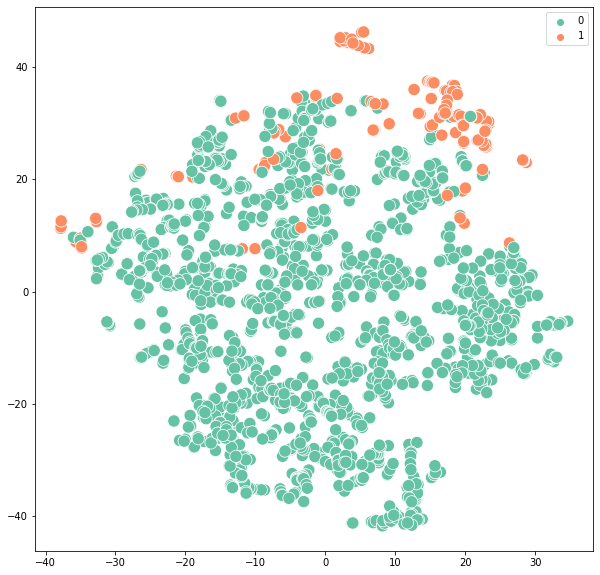

In [16]:
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    s=150,
    hue=labels,
    palette="Set2",
    legend='full'
)

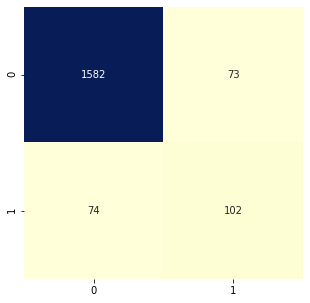

In [17]:

cm = confusion_matrix(y[0], labels)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

## Работа с чистыми данными

In [18]:
full_df = X.copy()
full_df['y'] = y
X_normal = full_df[full_df['y'] == 0]
X_outliers = full_df[full_df['y'] == 1]

In [19]:
X_normal.shape

(1655, 22)

In [20]:
X_normal.drop(['y'], axis=1, inplace=True)
X_outliers.drop(['y'], axis=1, inplace=True)

/Users/edzhurae/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
scaler = StandardScaler()
X_snormal = scaler.fit_transform(X_normal)

### Distance based

In [22]:
from sklearn.base import BaseEstimator
from scipy.spatial.distance import cdist

class DistanceOutliers(BaseEstimator):
    """
    Distance based outlier detector model
    
    Fit method calculates centroid of training samples and
    using `metric` get distances from centroid to train samples.
    Having distances - we calculate `threshold` based on `percentile`.
    
    Predict method uses `threshold` and `metric` to determine, whether
    distance to sample from centroid is too large -> outlier.
    
    -----------
    Parameters:
    
    - metric: string, default - euclidean
        metric to use for distance calculation (see scipy.spatial.distance.cdist)
        
    - percentile: float in range [0, 100]
        hyperparameter which sets the threshold for anomalies
    """
    def __init__(self, metric='euclidean', percentile=90):
        self.metric = metric
        self.percentile = percentile
        
    def fit(self, X):
        self.centroid = np.mean(X, axis=0).reshape(-1, 1).T
        distances_train = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        self.threshold = np.percentile(distances_train, self.percentile)
        
    def predict(self, X):
        distances = cdist(self.centroid, X, metric=self.metric).reshape(-1)
        predictions = (distances > self.threshold).astype(int)
        return predictions

In [23]:
euclidian_model = DistanceOutliers(metric='euclidean', percentile=90.4)
euclidian_model.fit(X_snormal)

In [24]:
pred_dist = euclidian_model.predict(X_scaled)

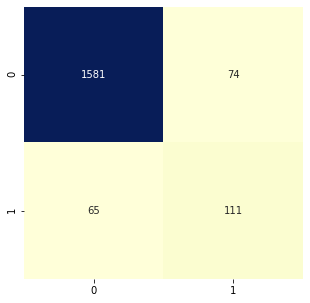

In [25]:
cm = confusion_matrix(y[0], pred_dist)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

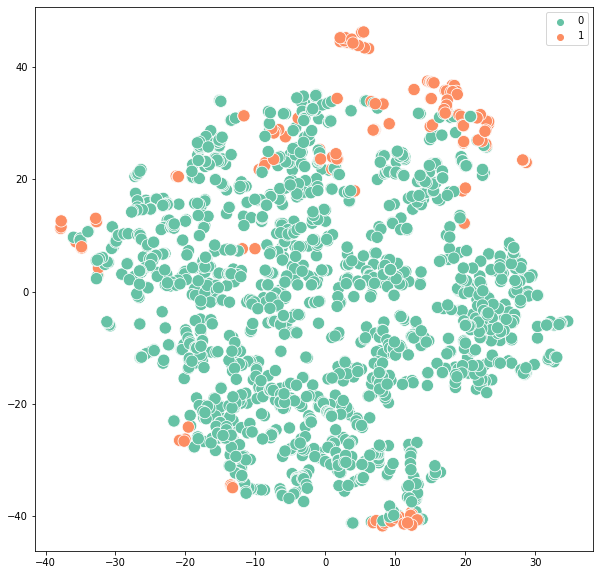

In [26]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    s=150,
    hue=pred_dist,
    palette="Set2",
    legend='full'
)

### One class SVM

In [27]:
from sklearn.svm import OneClassSVM
svm = OneClassSVM(kernel='rbf', nu=0.096, gamma='auto')
svm.fit(X_snormal)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
            max_iter=-1, nu=0.096, random_state=None, shrinking=True, tol=0.001,
            verbose=False)

In [28]:
pred_svm = svm.predict(X_scaled)

In [29]:
pred_svm = np.array([1 if p == -1 else 0 for p in pred_svm])

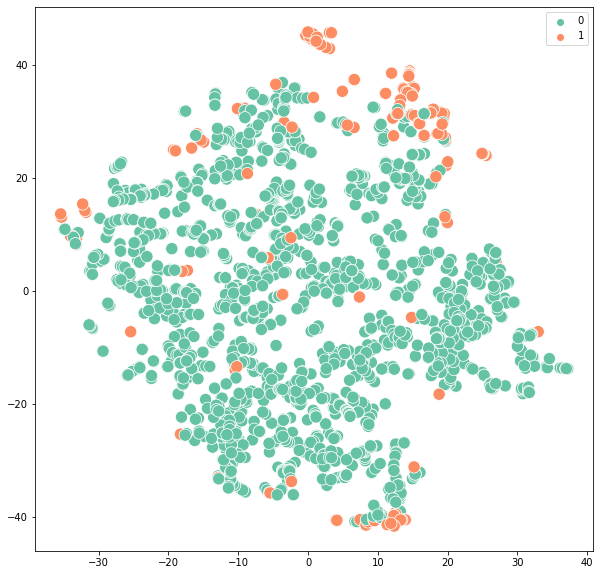

In [30]:
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2, random_state=42, n_jobs=-1)
tsne_transformed = tsne.fit_transform(X_scaled)
plt.figure(figsize=(10, 10))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
sns.scatterplot(
    x=tsne_transformed[:, 0], 
    y=tsne_transformed[:, 1], 
    s=150,
    hue=pred_svm,
    palette="Set2",
    legend='full'
)

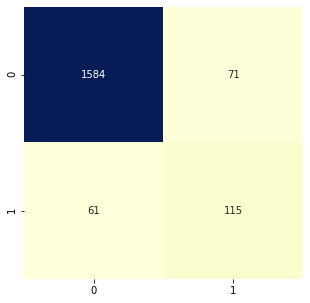

In [31]:
cm = confusion_matrix(y[0], pred_svm)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot=True,fmt='d',cmap="YlGnBu", cbar=False);

## Supervised methods

### Logistic regression

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample

#### no resampling:

In [33]:
y[0].value_counts()

0    1655
1     176
Name: 0, dtype: int64

In [34]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.004912,0.693191,-0.203640,0.595322,0.353190,-0.061401,-0.278295,-1.650444,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.622631,0.963083,0.301464,0.193113,0.231498,-0.289786,-0.493294
1,0.110729,-0.079903,-0.203640,1.268942,0.396246,-0.061401,-0.278295,-1.710270,0.759072,-0.420487,...,1.485973,-0.798376,1.854728,0.278625,0.963083,0.301464,0.129265,0.093563,-0.256385,-0.493294
2,0.216546,-0.272445,-0.203640,1.050988,0.148753,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,2.342663,-0.488279,0.061002,0.065417,0.024596,-0.256385,1.140018
3,0.004912,0.727346,-0.203640,1.212171,-0.683598,-0.061401,-0.278295,-1.710270,1.106509,-0.420487,...,1.141780,-1.332931,0.314688,1.654650,-0.488279,0.061002,0.193113,0.093563,-0.323186,1.140018
4,-0.100905,0.363595,1.321366,1.027120,0.141359,-0.061401,-0.278295,-0.992364,-0.051613,-0.420487,...,-0.208514,-0.085638,-0.565334,0.278625,-0.488279,-0.059229,0.065417,0.024596,-0.456787,1.140018


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)  
print(X_test.shape) 

(1281, 21)
(550, 21)


/Users/edzhurae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/edzhurae/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


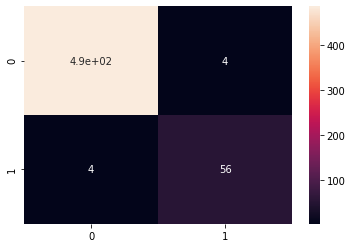

In [36]:
lc = LogisticRegression(random_state = 42)
lc.fit(X_train, Y_train)
Y_pred_lc = lc.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred_lc)
sns.heatmap(cm, annot=True)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
def quality(prediction_y, true_y, name):
    accuracy = accuracy_score(prediction_y, true_y)
    precision = precision_score(prediction_y, true_y)
    recall = recall_score(prediction_y, true_y)
    f1 = f1_score(prediction_y, true_y)
    print("Metrics for {}\nAccuracy:  {:.3f}\nPrecision: {:.3f}\nRecall:    {:.3f}\nF1-score:  {:.3f}".format(name,
        accuracy, precision, recall, f1
    ))

In [40]:
quality(Y_pred_lc, Y_test, "logistic no resample")

Metrics for logistic no resample
Accuracy:  0.985
Precision: 0.933
Recall:    0.933
F1-score:  0.933


#### with resample:

In [41]:
df = X.copy()
df['y'] = y

df_majority = df[df.y==0]
df_minority = df[df.y==1]
 
df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=1500,
                                 random_state=42)
 
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
df_upsampled.y.value_counts()

0    1655
1    1500
Name: y, dtype: int64

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(df_upsampled.drop('y', axis=1), df_upsampled['y'], test_size = 0.3, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)  
print(X_test.shape)  

(2208, 21)
(947, 21)


In [45]:
logistic_classifier = LogisticRegression(random_state = 42)
logistic_classifier.fit(X_train, Y_train)
Y_pred_logistic = logistic_classifier.predict(X_test)

/Users/edzhurae/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


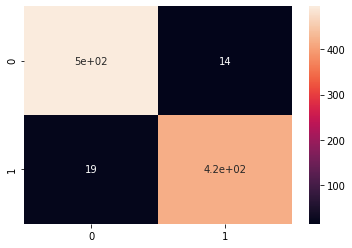

In [46]:
cm = confusion_matrix(Y_test, Y_pred_logistic)
sns.heatmap(cm, annot=True)

In [47]:
quality(Y_pred_logistic, Y_test, "logistic resample")

Metrics for logistic resample
Accuracy:  0.965
Precision: 0.957
Recall:    0.968
F1-score:  0.962


## Выводы

DBSCAN vs Isolation Forest -  DBSCAN has gives better results than Isolation Forest, though both of them showing moderate performance

Distance based vs One class SVM - SVM shows just a bit better results than Distance based. Overall worked better than DBSCAN and Isolation Forest.

Supervised learning - (in our case Logistic regression) has shown best results. 